## Matplotlib을 사용한 옵션 암묵적 변동성 표면 그리기

트레이더들은 Matplotlib을 사용하여 옵션의 암묵적 변동성 표면과 같은 복잡한 데이터를 시각화합니다. 이러한 시각화는 옵션의 암묵적 변동성이 만기일과 행사가격에 따라 어떻게 변화하는지 이해하는 데 도움을 줍니다. 암묵적 변동성 표면은 시장이 미래 변동성에 대해 가지는 기대를 파악하는 데 중요한 정보를 제공합니다.

이 표면은 두 가지 주요 특징을 보여줍니다: **왜도(skew)** 와 **기간 구조(term structure)** 입니다.  
- **왜도(skew)**: 동일한 만기일에 대해 서로 다른 행사가격에서 암묵적 변동성이 어떻게 변하는지를 나타냅니다. 이는 시장이 중요한 가격 변동을 기대하는지를 보여줄 수 있습니다.  
- **기간 구조(term structure)**: 동일한 행사가격이지만 다른 만기일을 가진 옵션에서 암묵적 변동성이 시간에 따라 어떻게 변화하는지를 나타냅니다. 이는 변동성이 시간이 지나며 어떻게 변화할 것으로 예상되는지를 보여줍니다.

왜도와 기간 구조에 대한 자세한 설명은 이 책의 범위를 벗어나지만, 이러한 변동성 표면의 측면들은 정보에 입각한 거래 결정을 내리는 데 중요합니다. 또한, 헤징에 적합한 옵션을 선택하고, 더 복잡한 금융 상품에 대한 가격 책정 및 리스크 평가 모델을 미세 조정하는 데 중요한 역할을 합니다.

---

### 준비하기...

애니메이션 플롯과 같은 축에서 표면 플롯을 그리지 않기 위해 새 Jupyter Notebook을 시작합니다.

---

#### mpl_toolkits.Axes3D
애니메이션 차트와 마찬가지로 3차원 표면을 생성하려면 `mpl_toolkits` 모듈의 `Axes3D` 클래스를 가져와야 합니다.

1. **라이브러리 가져오기**:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb

In [5]:
obb.user.preferences.output_type = "dataframe"

2. **OpenBB SDK를 사용하여 옵션 데이터 다운로드**:

"cboe" 제공자를 사용하여 "AAPL" 주식의 옵션 체인을 가져와서 'chains'에 저장

In [9]:
chains = obb.derivatives.options.chains("AAPL", provider="cboe")

3. **만기일까지의 기간이 3개월 미만이고 행사가격이 100 이상인 콜 데이터를 필터링하고 중복 제거**:

콜 옵션만 포함하도록 옵션 체인을 필터링

In [11]:
calls = chains[chains.option_type == "call"]

만기까지 90일 미만이고 행사가격이 100 이상인 콜 옵션만 필터링

In [12]:
calls = calls[(calls.dte < 90) & (calls.strike >= 100)]

'strike'와 'dte' 열을 기준으로 중복된 행을 제거하고 첫 번째 발생을 유지

In [13]:
calls.drop_duplicates(subset=["strike", "dte"], keep=False, inplace=True)

4. **행에 행사가격, 열에 만기일까지의 기간, 셀에 암묵적 변동성을 배치하도록 DataFrame 피벗**:

'strike'와 'dte'를 기준으로 데이터를 피벗하고 'implied_volatility'를 값으로 사용하여 변동성 표면을 생성하고, 모든 값이 NaN인 열을 제거합니다

In [14]:
vol_surface = calls.pivot(
    index="strike", columns="dte", values="implied_volatility"
).dropna(how="all", axis=1)

5. **NumPy의 `meshgrid` 메서드를 사용하여 플롯에 사용할 행사가격과 만기일로 2차원 격자 생성**:

변동성 표면을 기반으로 'strike'와 'dte'에 대한 메시그리드 생성

In [15]:
strike, dte = np.meshgrid(vol_surface.columns, vol_surface.index)

6. 마지막으로 표면을 그립니다:

3D 플롯 생성

/Users/hyeyongseo/anaconda3/envs/qt/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/hyeyongseo/anaconda3/envs/qt/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/hyeyongseo/anaconda3/envs/qt/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44620 (\N{HANGUL SYLLABLE GGA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/hyeyongseo/anaconda3/envs/qt/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/hyeyongseo/anaconda3/envs/qt/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  func(*args, **kwarg

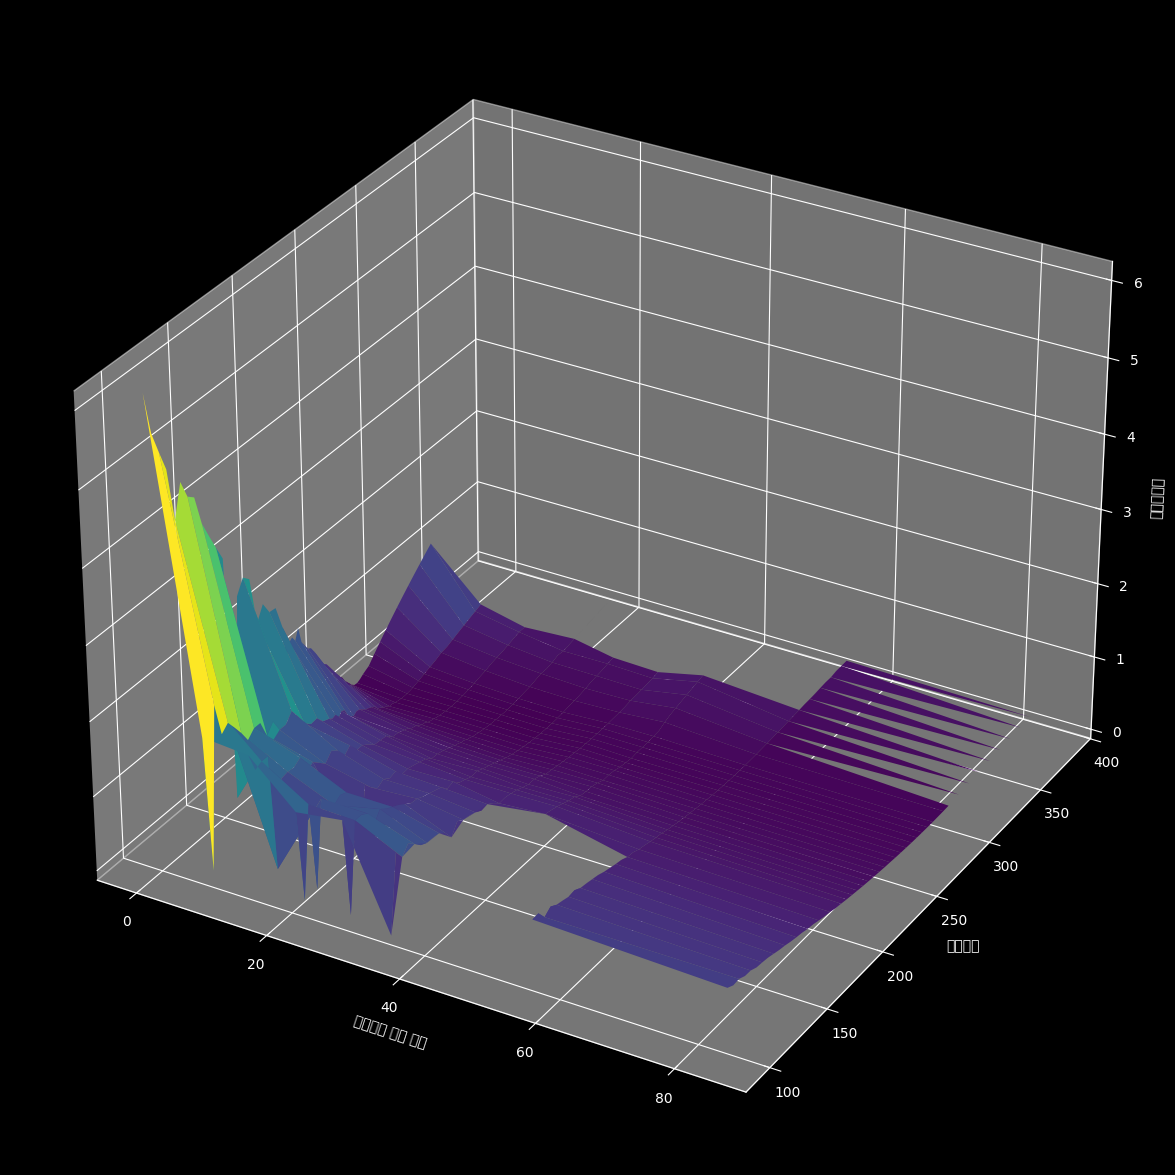

In [16]:
# 15x15 크기의 새로운 figure 생성
fig = plt.figure(figsize=(15, 15))
# 3D 프로젝션을 사용하여 subplot 추가
ax = fig.add_subplot(111, projection="3d")

# x축 레이블을 '만기까지 남은 일수'로 설정
ax.set_xlabel("만기까지 남은 일수")
# y축 레이블을 '행사가격'으로 설정
ax.set_ylabel("행사가격")
# z축 레이블을 '내재변동성'으로 설정
ax.set_zlabel("내재변동성")

# viridis 컬러맵을 사용하여 3D 표면 플롯 생성
ax.plot_surface(strike, dte, vol_surface.values, cmap="viridis")

결과는 x축에 행사가격, y축에 만기일까지의 기간, z축에 암묵적 변동성을 표시하는 3차원 표면 플롯입니다.

---

### 작동 방식

옵션 데이터를 다운로드하고, 만기일이 90일 이내이고 행사가격이 $100 이상인 옵션으로 데이터셋을 좁힙니다. 그 후 동일한 행사가격과 만기일을 가진 항목을 제거하여 데이터의 고유성을 보장합니다. 프로세스의 핵심은 각 행과 열이 서로 다른 행사가격과 만기일을 나타내는 DataFrame으로 데이터를 재구성하는 것입니다. 그런 다음 NumPy의 `meshgrid` 메서드를 사용하여 행사가격과 만기일에 해당하는 2차원 격자를 생성합니다. 이 격자는 `vol_surface` DataFrame과 동일한 구조를 가집니다. 이 과정을 통해 최종적으로 x축에 행사가격, y축에 만기일, z축에 암묵적 변동성을 나타내는 3D 플롯이 생성됩니다.

---

### 더 알아보기...

Matplotlib의 3D 축의 `plot_surface` 메서드는 3차원 표면 플롯을 쉽게 생성할 수 있는 방법을 제공합니다. 이전 섹션에서 사용된 인수 외에도 알고리즘 거래에서 자주 사용되는 몇 가지 인수가 있습니다:

1. **`rstride`와 `cstride`**: 표면 플롯을 생성하는 데 사용되는 행(row) 및 열(column) 데이터의 단계 크기를 설정합니다.
2. **`color`**: 전체 표면에 사용할 수 있는 단일 색상.
3. **`facecolors`**: Z와 동일한 크기의 행렬로, 표면 플롯의 각 면에 대한 색상을 제공합니다.
4. **`linewidth`**: 표면 플롯에 그려진 와이어프레임의 선 두께를 설정합니다. 기본값은 0으로, 와이어프레임이 없습니다.
5. **`antialiased`**: `True`로 설정하면 표면이 부드럽게(안티앨리어싱) 표시됩니다.
6. **`shade`**: `True`로 설정하면 표면 플롯이 조명과 방향에 따라 그라데이션 효과를 갖습니다.
7. **`vmin`과 `vmax`**: 컬러바 범위. `None`이면 각각 `min(z)` 또는 `max(z)`를 사용하여 계산됩니다.
8. **`facecolors`**: 표면 플롯의 개별 패치의 면 색상.

---

### 참고 자료

플롯팅, 수익률 곡선, 암묵적 변동성 표면에 대해 더 알아보려면 아래 리소스를 참조하세요:
- Matplotlib의 `plot_surface` 메서드에 대한 문서: [Matplotlib Plot Surface Documentation](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html)
- 역전된 수익률 곡선의 역사에 대한 정보: [Inverted Yield Curve - Investopedia](https://www.investopedia.com/terms/i/invertedyieldcurve.asp)
- 암묵적 변동성 표면의 실제 사용 사례에 대한 정보: [Volatility Surface Explained - Investopedia](https://www.investopedia.com/articles/stock-analysis/081916/volatility-surface-explained.asp)

---

## Seaborn을 사용한 통계적 관계 시각화

알고리즘 거래의 주요 부분 중 하나는 **팩터 엔지니어링**입니다. 팩터 엔지니어링은 종종 **알파 팩터(alpha factors)** 라고 불리는 알고리즘 거래 모델을 위한 예측자를 생성하는 과정을 포함합니다. 이 팩터들은 시장에서 발견되는 패턴이나 이상 현상을 나타냅니다. 이러한 팩터는 과거 및 실시간 데이터를 기반으로 미래 가격 움직임을 예측하는 데 목적을 둡니다.  

팩터 엔지니어링은 점점 더 머신 러닝과 통계적 방법에 의존하고 있습니다. 이러한 도구는 방대한 데이터 세트에서 패턴을 자동으로 추출하는 데 도움을 줍니다. 예를 들어, 신경망과 같은 머신 러닝 모델은 전통적인 방법에서 놓칠 수 있는 비선형 관계를 식별할 수 있습니다.  
- **특징 선택(feature selection)**: 가장 관련성이 높은 예측 변수를 결정합니다.  
- **정규화(regularization)**: 과적합을 방지하여 모델의 견고성을 보장합니다.  
- **클러스터링 및 차원 축소**: 복잡한 데이터 세트를 관리하는 데 도움을 줍니다.

**Seaborn** 라이브러리는 통계적 관계를 시각화하는 데 특화되어 있으며, 팩터 엔지니어링에 중요한 도구입니다. Seaborn은 Matplotlib 위에 구축되었으며 pandas와 통합되어 이러한 도구를 사용하는 사용자들에게 친숙합니다.

---

### 어떻게 할까요...

다음은 통계적 플롯을 위해 Seaborn을 사용하는 방법입니다:

1. **라이브러리 가져오기**:

In [58]:
import warnings

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from openbb import obb

In [60]:
warnings.filterwarnings("ignore")
obb.user.preferences.output_type = "dataframe"

2. **OpenBB SDK를 사용하여 주가 이력 다운로드**:

"yfinance" 제공자를 사용하여 2020-01-01부터 시작하는 "AAPL"과 "SPY"의 과거 가격 데이터를 가져오고 데이터를 피벗합니다

In [61]:
data = obb.equity.price.historical(
    ["AAPL", "SPY"], start_date="2020-01-01", provider="yfinance"
).pivot(columns="symbol", values="close")

3. **일일 수익률 계산**:

가격의 백분율 변화를 계산하고 NaN 값을 제거합니다

In [62]:
returns = data.pct_change(fill_method=None).dropna()

4. **pandas의 `melt` 메서드를 사용하여 데이터를 긴 형식으로 변환**:

'returns'의 인덱스를 재설정합니다

In [125]:
returns = returns.reset_index()
returns.head()

symbol,level_0,index,date,AAPL,SPY
0,0,0,2020-01-03,-0.009722,-0.007572
1,1,1,2020-01-06,0.007968,0.003815
2,2,2,2020-01-07,-0.004703,-0.002812
3,3,3,2020-01-08,0.016086,0.005330
4,4,4,2020-01-09,0.021241,0.006781


'returns' DataFrame을 변환합니다

In [126]:
melted = pd.melt(
    returns,
    id_vars=["date"],
    value_vars=["AAPL"],
    var_name="stock",
    value_name="returns",
)

In [127]:
melted.head()

,date,stock,returns
0,2020-01-03,AAPL,-0.009722
1,2020-01-06,AAPL,0.007968
2,2020-01-07,AAPL,-0.004703
3,2020-01-08,AAPL,0.016086
4,2020-01-09,AAPL,0.021241


5. **월별 데이터를 위한 새 열 추가**:

melted DataFrame에 'month' 열을 추가합니다

In [65]:
melted["month"] = pd.to_datetime(melted.date).dt.to_period("M")

In [17]:
melted

NameError: name 'melted' is not defined

6. **박스 플롯 생성**:

월별 수익률의 박스 플롯을 생성합니다

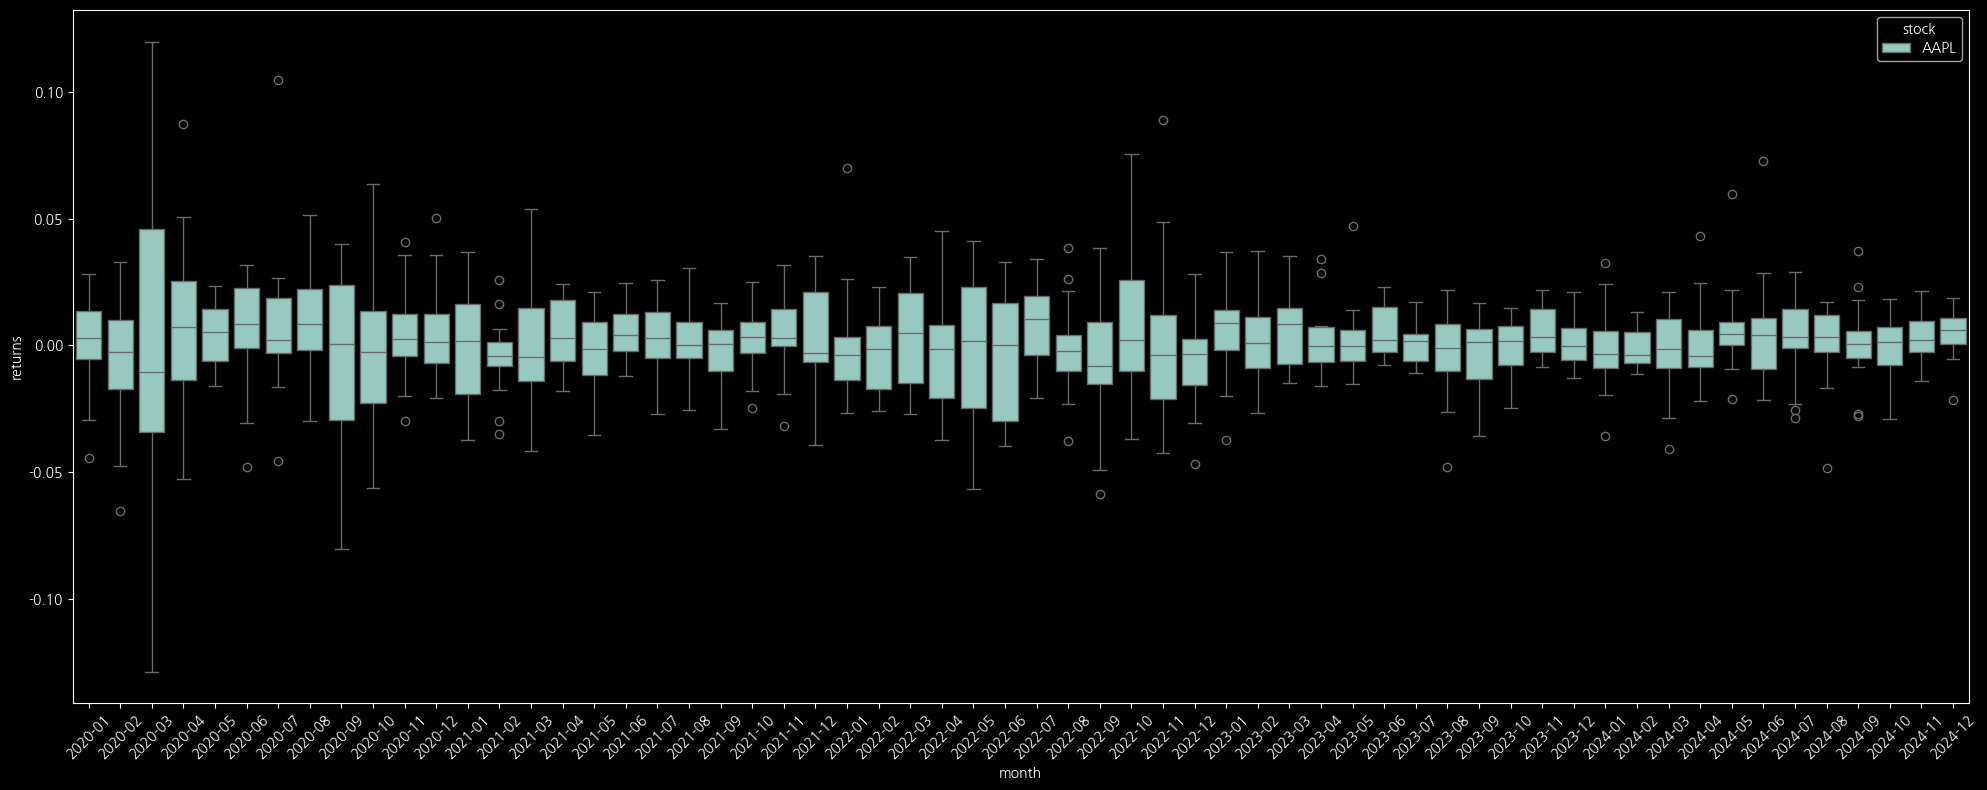

In [66]:
plt.figure(figsize=(20, 8))  # 가로로 더 긴 그림 크기 설정
g = sns.boxplot(x="month", y="returns", hue="stock", data=melted)
g.set_xticklabels(melted["month"].unique(), rotation=45)
plt.tight_layout()  # 여백 자동 조정

### 작동 방식
* 코드는 AAPL 종가의 일일 퍼센트 변화를 계산하고 모든 `NaN` 값을 제거 
* 그런 다음 이 수익률 시리즈를 날짜와 해당 날짜의 수익률이라는 두 개의 열을 가진 DataFrame으로 변환 
* `melt`를 사용하여 DataFrame을 Seaborn의 `boxplot` 함수와 호환되도록 재구성
* 또한 각 날짜에서 월(month)을 추출하여 새 열로 추가
* 마지막으로, `boxplot` 메서드는 x축에 월, y축에 수익률을 표시하는 박스 플롯을 생성
* x축 레이블(월)은 가독성을 위해 45도 회전하여 설정됨

최종 시각화는 데이터의 각 월에 대한 AAPL의 일일 수익률 분포를 보여줍니다.

---

#### jointplot - 산점도 + 변수의 히스토그램 

* 또 다른 인기 있는 차트 유형은 **`jointplot`** 입니다. 
* 이는 **산점도**와 **각 변수의 히스토그램을 가장자리 영역에 결합한 차트**입니다. 
* 트레이더들은 **`jointplot`** 을 사용하여 자산 간의 상관관계를 시각적으로 평가하며, 
* 이는 분산 투자, 페어 트레이딩, 리스크 관리를 지원합니다. 
* 이 플롯은 선형 관계, 분포 패턴, 잠재적 이상치를 식별하는 데 도움을 줍니다.

"SPY"와 "AAPL" 수익률의 조인트 플롯을 회귀선과 함께 생성합니다

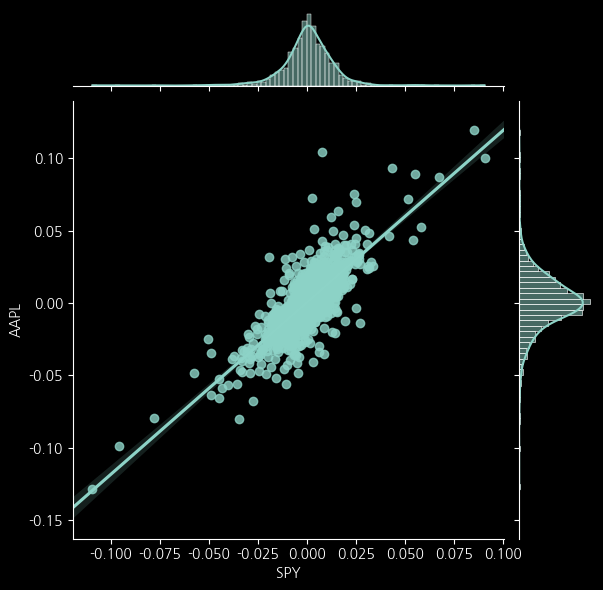

In [67]:
g = sns.jointplot(
    x="SPY",
    y="AAPL",
    data=returns,
    kind="reg",
    truncate=False,
)

결과는 **조인트 플롯(joint plot)** 입니다.

>팁
>`kind` 매개변수에 전달된 **`reg`** 인수는 그릴 플롯의 유형을 나타냅니다. 
* "reg"는 회귀를 의미하며, Seaborn은 SPY와 AAPL 수익률의 산점도를 그릴 뿐만 아니라 데이터를 기반으로 선형 회귀선을 계산하고 표시합니다.

트레이더들은 상관 행렬을 사용하여 여러 자산 간의 선형 관계를 동시에 이해합니다. <br> 
이제 다우 존스 산업 평균지수(DJIA) 내 주식의 상관 행렬을 만들어 보겠습니다.

#### 상관 행렬: 히트맵
* 다우 지수 평균 내 주식의 상관 행렬 

1. 첫 번째 단계는 회사 목록과 DJIA Wikipedia 페이지에서 티커 심볼을 가져오는 것입니다. Wikipedia에서 다우존스 산업평균지수 데이터를 가져옵니다

In [92]:
dji = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[2]

pandas의 `read_html` 메서드는 웹페이지에서 표를 추출하는 편리한 함수입니다. 여기서는 두 번째 표(인덱스 1)를 사용합니다. 이 표는 DJIA에 포함된 회사에 대한 세부 정보를 포함합니다.

2. **티커 심볼을 확보한 후, 이를 사용하여 과거 주가 데이터를 가져오고 일일 수익률을 계산합니다**:

"yfinance" 제공자를 사용하여 2020-01-01부터 시작하는 DJI 구성 종목의 과거 가격 데이터를 가져오고 피벗합니다

In [93]:
dji_data = (
    obb.equity.price.historical(
        dji.Symbol, start_date="2020-01-01", provider="yfinance"
    )
).pivot(columns="symbol", values="close")

3. **pandas의 `corr` 메서드를 사용하여 모든 주식 간의 쌍별 상관관계를 계산합니다**:

Calculates the percentage change in prices and drops any NaN values for the DJI data

In [94]:
dji_returns = dji_data.pct_change(fill_method=None).dropna()

DJI 수익률에 대한 상관 행렬을 계산합니다

In [95]:
corr = dji_returns.corr()

4. **상관 행렬을 시각화하기 전에 히트맵을 더 직관적으로 만들기 위해 몇 가지 조정을 합니다. 먼저, 상관 행렬의 상삼각형을 숨기기 위한 마스크를 생성합니다**:

상관 행렬의 상삼각형을 숨기기 위한 마스크를 생성합니다

In [96]:
mask = np.triu(np.ones_like(corr, dtype=bool))

5. **히트맵에서 양의 상관관계와 음의 상관관계를 시각적으로 구분하기 위해 색상 팔레트를 생성합니다**:

사용자 정의 발산 컬러맵을 생성합니다

In [97]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

6. **폰트 크기를 4포인트로 설정하여 더 많은 레이블을 포함시키고 히트맵을 플롯합니다**:

Draws the heatmap with the mask and correct aspect ratio

<Axes: xlabel='symbol', ylabel='symbol'>

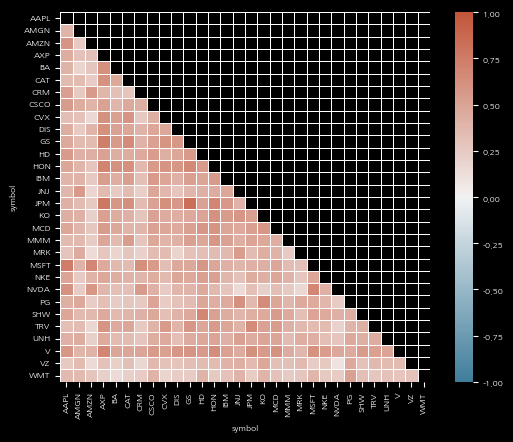

In [128]:
plt.rcParams["font.size"] = 6
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    square=True,
    linewidths=0.5,
)

---

### 참고 자료

Seaborn은 독창적인 시각화 유형이 많은 인기 있는 차트 라이브러리입니다. 자세한 내용을 보려면 아래 링크를 참고하세요:

- [Seaborn 박스플롯 문서](https://seaborn.pydata.org/generated/seaborn.boxplot.html)  
- [Seaborn 조인트플롯 문서](https://seaborn.pydata.org/generated/seaborn.jointplot.html)  
- [Seaborn 히트맵 문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html)  

---

## Plotly Dash를 사용한 대화형 PCA 분석 대시보드 생성

**주성분 분석(Principal Component Analysis, PCA)**은 데이터 과학에서 널리 사용되는 기법으로, 데이터 세트의 차원을 줄이는 데 활용됩니다. 주식 포트폴리오의 경우, 하나의 차원은 특정 주식의 수익률 열일 수 있습니다. 100개의 주식으로 구성된 포트폴리오에서는 100개의 차원이 존재합니다. PCA는 이러한 ** 100개의 차원을 데이터의 분산을 가장 잘 설명하는 소수의 차원으로 변환 ** 합니다.

PCA는 포트폴리오의 통계적 수익률 요인을 분리합니다. 이러한 요인은 **알파 팩터(alpha factors)**라고 하며, 벤치마크로 설명되지 않는 수익률을 생성하기 때문입니다. 퀀트는 이러한 요인을 거래 전략에서 사용합니다. 먼저 요인을 분리한 후, 특정 요인에 가장 많이 노출된 주식을 매수하고, 가장 적게 노출된 주식을 매도합니다.  

이번 레시피에서는 PCA를 사용하여 **Plotly Dash 웹 애플리케이션**을 생성합니다. 이 앱은 티커 심볼 목록을 받아들이고, 주요 구성 요소를 식별하며, 상위 요인을 시각화하는 플롯을 생성합니다.

---

### 준비하기

이전에 작성했던 코드는 Jupyter Notebook에서 실행되었습니다. 이번 레시피에서는 `app.py`라는 Python 스크립트를 작성하고 명령줄에서 실행합니다. 목표는 기본적인 PCA 분석 앱에는 필수적이지 않더라도, Plotly Dash의 흥미로운 기능을 강조하는 것입니다.

**필요한 라이브러리 설치**

아래 명령어를 실행하여 새로운 라이브러리를 설치합니다:
```bash
pip install dash plotly dash-bootstrap-components scikit-learn
```
**Plotly**와 **scikit-learn**은 OpenBB 플랫폼 설치를 통해 이미 설치되었을 수 있습니다.



Plotly는 layout 과 callback 함수로 백엔드로 구동되는 부분으로 나눌 수 있음 

---

### 어떻게 할까요...

모든 코드는 `app.py` 파일에 작성해야 합니다.

1. **웹 애플리케이션 생성에 필요한 모든 라이브러리 가져오기**:
```python
import datetime
import numpy as np
import pandas as pd
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.decomposition import PCA
from openbb import obb
obb.user.preferences.output_type = "dataframe"
```

2. **기본 스타일, 차트 템플릿 설정 및 앱 초기화**:
```python
pio.templates.default = "plotly"
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
```

3. 사용자 인터페이스 구성 요소 생성

- 텍스트 필드에서 티커 심볼 목록을 입력하도록 하고, 드롭다운을 통해 구성 요소 수를 선택하며, 날짜 선택기를 사용하여 데이터 범위를 선택하고, 앱을 실행하기 위한 제출 버튼을 추가합니다:

```python
ticker_field = [
    html.Label("Enter Ticker Symbols:"),
    dcc.Input(
        id="ticker-input",
        type="text",
        placeholder="Enter Tickers separated by commas (e.g., AAPL, MSFT)",
        style={"width": "50%"}
    )
]

components_field = [
    html.Label("Select Number of Components:"),
    dcc.Dropdown(
        id="component-dropdown",
        options=[{"label": i, "value": i} for i in range(1, 6)],
        value=3,
        style={"width": "50%"}
    )
]

date_picker_field = [
    html.Label("Select Date Range:"),  # 날짜 선택기를 위한 레이블
    dcc.DatePickerRange(
        id="date-picker",
        start_date=datetime.datetime.now() - datetime.timedelta(365 * 3),
        end_date=datetime.datetime.now(),  # 기본값: 오늘 날짜
        display_format="YYYY-MM-DD",
    )
]

submit = [
    html.Button("Submit", id="submit-button"),
]
```

4. 시각화를 위한 폼 요소와 자리 표시자를 결합하여 앱 레이아웃 구성

```python
app.layout = dbc.Container(
    [
        html.H1("PCA on Stock Returns"),
        dbc.Row([dbc.Col(ticker_field)]),
        dbc.Row([dbc.Col(components_field)]),
        dbc.Row([dbc.Col(date_picker_field)]),
        dbc.Row([dbc.Col(submit)]),
        dbc.Row(
            [
                dbc.Col(dcc.Graph(id="bar-chart"), width=4),
                dbc.Col(dcc.Graph(id="line-chart"), width=4),
                dbc.Col(dcc.Graph(id="scatter-plot"), width=4),
            ]
        ),
    ]
)
```

5. 사용자 입력에 따라 차트를 업데이트하는 함수 구현

**중요**: 5단계와 13단계 사이의 모든 코드는 동일한 함수에 속합니다. 정의 후 코드를 적절히 들여쓰는 것을 확인하세요.

```python
@app.callback(
    [
        Output("bar-chart", "figure"),
        Output("line-chart", "figure"),
        Output("scatter-plot", "figure"),
    ],
    [Input("submit-button", "n_clicks")],
    [
        dash.dependencies.State("ticker-input", "value"),
        dash.dependencies.State("component-dropdown", "value"),
        dash.dependencies.State("date-picker", "start_date"),
        dash.dependencies.State("date-picker", "end_date"),
    ],
)
def update_graphs(n_clicks, tickers, n_components, start_date, end_date):
    if not tickers:
        return {}, {}, {}
```

6. 사용자 입력을 파싱

```python
tickers = tickers.split(",")
start_date = datetime.datetime.strptime(start_date, "%Y-%m-%dT%H:%M:%S.%f").date()
end_date = datetime.datetime.strptime(end_date, "%Y-%m-%dT%H:%M:%S.%f").date()
```

7. 주식 데이터 다운로드

```python
data = obb.equity.price.historical(
    tickers,
    start_date=start_date,
    end_date=end_date,
    provider="yfinance"
).pivot(columns="symbol", values="close")
daily_returns = data.pct_change().dropna()
```

8. 주성분 분석 모델 적합

```python
pca = PCA(n_components=n_components)
pca.fit(daily_returns)
explained_var_ratio = pca.explained_variance_ratio_
```

9. 개별 설명 분산을 위한 막대 차트 생성

```python
bar_chart = go.Figure(
    data=[
        go.Bar(
            x=["PC" + str(i + 1) for i in range(n_components)],
            y=explained_var_ratio,
        )
    ],
    layout=go.Layout(
        title="Explained Variance by Component",
        xaxis=dict(title="Principal Component"),
        yaxis=dict(title="Explained Variance"),
    ),
)
```

10. 누적 설명 분산에 대한 선형 차트 생성

```python
cumulative_var_ratio = np.cumsum(explained_var_ratio)
line_chart = go.Figure(
    data=[
        go.Scatter(
            x=["PC" + str(i + 1) for i in range(n_components)],
            y=cumulative_var_ratio,
            mode="lines+markers",
        )
    ],
    layout=go.Layout(
        title="Cumulative Explained Variance",
        xaxis=dict(title="Principal Component"),
        yaxis=dict(title="Cumulative Explained Variance"),
    ),
)
```

11. 요인 노출 계산

```python
X = np.asarray(daily_returns)
factor_returns = pd.DataFrame(
    columns=["f" + str(i + 1) for i in range(n_components)],
    index=daily_returns.index,
    data=X.dot(pca.components_.T),
)
factor_exposures = pd.DataFrame(
    index=["f" + str(i + 1) for i in range(n_components)],
    columns=daily_returns.columns,
    data=pca.components_,
).T
labels = factor_exposures.index
data = factor_exposures.values
```

12. 요인 노출에 대한 차트 생성

```python
scatter_plot = go.Figure(
    data=[
        go.Scatter(
            x=factor_exposures["f1"],
            y=factor_exposures["f2"],
            mode="markers+text",
            text=labels,
            textposition="top center",
        )
    ],
    layout=go.Layout(
        title="Scatter Plot of First Two Factors",
        xaxis=dict(title="Factor 1"),
        yaxis=dict(title="Factor 2"),
    ),
)
```

13. 앱에 차트 반환

```python
return bar_chart, line_chart, scatter_plot
```

---

**앱 실행 방법**

1. 터미널을 열고 `app.py` 스크립트가 있는 디렉터리로 이동합니다.
2. 다음 명령어를 실행합니다:
   ```bash
   python app.py
   ```

코드를 실행하면 앱이 시작되고 실행 중인 URL이 출력됩니다. 해당 URL로 이동하여 티커 목록을 입력하고 "Submit"을 누릅니다. 결과는 아래와 같은 모습일 것입니다.

### 작동 방식

Plotly Dash의 **콜백(callback)** 은 애플리케이션 내 구성 요소를 연결하는 논리를 정의합니다. 이러한 콜백은 사용자 상호작용을 가능하게 하며, 특정 입력 구성 요소의 속성이 변경될 때마다 Dash에 의해 자동으로 실행되는 Python 함수를 의미합니다. 이 앱에서 콜백은 **`update_graphs`** 로 정의됩니다.

**주요 작업:**

1. **필요한 라이브러리 가져오기**  
   분석 및 웹 앱 작성을 위해 다음과 같은 라이브러리를 가져옵니다:  
   - **datetime**: 날짜 처리를 위해 사용  
   - **NumPy**: 수치 연산을 위해 사용  
   - **pandas**: 데이터 조작을 위해 사용  
   - Dash 및 확장 패키지: 애플리케이션의 주요 구조를 제공합니다.  
   - **dash_bootstrap_components**: 스타일링 지원  
   - OpenBB: 주식 데이터를 가져오는 데 사용  
   - **scikit-learn**의 PCA: 주성분 분석 수행  

2. **기본 템플릿 및 Dash 앱 초기화**  
   차트를 스타일링하기 위한 기본 템플릿을 선택하고, Bootstrap 테마를 사용하여 Dash 앱을 초기화합니다.  
   
3. **사용자 인터페이스 구성 요소 생성**  
   - 티커 심볼을 입력하기 위한 텍스트 필드  
   - 주성분 수를 선택하기 위한 드롭다운 메뉴  
   - 날짜 범위를 지정하기 위한 날짜 선택기  
   - 분석 시작을 위한 제출 버튼  
   
4. **UI 레이아웃 구성**  
   이러한 구성 요소를 레이아웃에 정리합니다.

**콜백 함수 구현**

콜백 함수 **`update_graphs`** 는 사용자 입력을 시각화 출력과 연결합니다. 사용자가 제출 버튼을 누를 때마다 이 함수가 데이터를 가져오고, PCA를 수행하며, 시각화를 업데이트합니다. Dash의 **`callback`** 데코레이터를 사용하여 콜백을 정의합니다.  

- **`Output`**: 콜백 함수 실행 후 업데이트할 구성 요소를 지정합니다.  
- **`Input`**: 콜백이 청취할 구성 요소를 지정합니다.  
- **`State`**: 함수 실행 없이 현재 값을 읽을 구성 요소를 지정합니다.  

사용자가 제출 버튼을 클릭하면, **`update_graphs`** 가 호출되고, 지정된 구성 요소의 현재 값이 함수에 인수로 전달됩니다. 그런 다음 함수 내부의 논리가 실행되어 시각화 결과를 반환하며, 이는 지정된 **`Output`** 구성 요소에 렌더링됩니다.

---



### 더 알아보기...

다양한 Python 라이브러리를 활용한 플로팅은 상황에 따라 서로 다른 장점을 제공합니다:
- **pandas**: 데이터 조작에 탁월하지만, 간단한 시각화에 적합하며 상호작용 기능이 부족합니다.  
- **Matplotlib**: 유연성과 커스터마이징 기능이 뛰어나지만, 일반적으로 상호작용 기능은 제한적입니다.  
- **Seaborn**: Matplotlib 위에 구축되어 시각적 미학을 강화하고, 통계적 시각화에 특화된 기능을 제공합니다.  
- **Plotly Express**: 현대적인 상호작용 중심의 라이브러리로, Plotly Dash와 같은 동적 환경에 적합합니다.

---

### 참고 자료

1. **PCA 설명**: [PCA 개요 - Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)  
2. **Plotly Dash 사용자 가이드**: [Plotly Dash User Guide](https://dash.plotly.com)  

---